In [5]:
#imports
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#load dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning, making the job_posting_date a datetime object
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

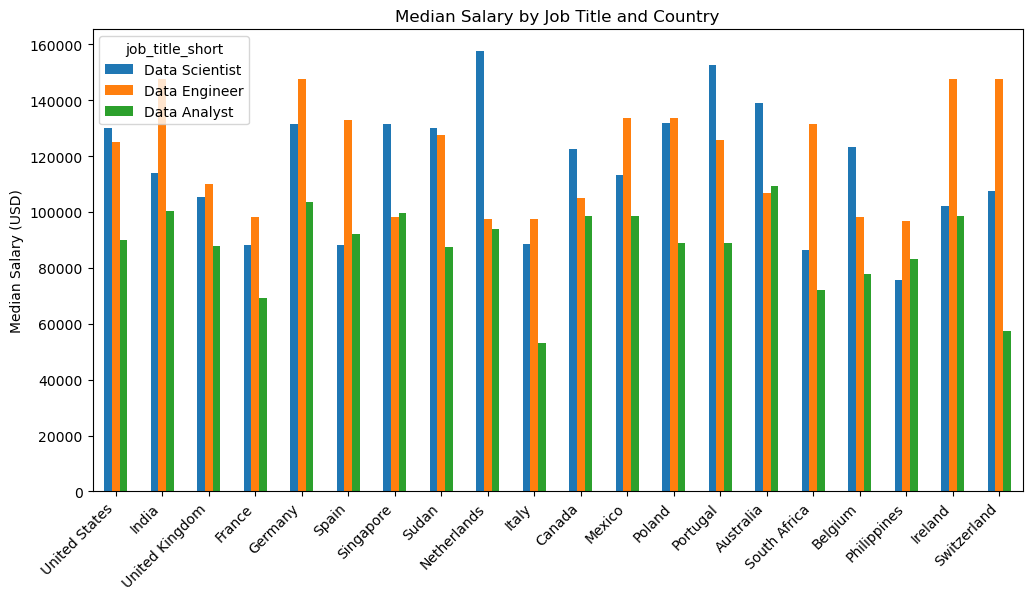

In [64]:
top_countries = df['job_country'].value_counts().head(20).index

df_job_country_by_salary = df.pivot_table(values='salary_year_avg' ,columns='job_title_short',index='job_country', aggfunc='median')

df_job_country_by_salary = df_job_country_by_salary.loc[top_countries]

job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
df_job_country_by_salary[job_titles].plot(kind='bar' , figsize=(12, 6))
plt.title('Median Salary by Job Title and Country')
plt.xlabel('')
plt.ylabel('Median Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()
